## 1. Implementing a CNN from Scratch

### 1.1. Introduction

### **Objective:** 
Develop a Convolutional Neural Network model to classify vegetable images from the vegetable Dataset.


### **Dataset:** 
The provided dataset is an image dataset with 4500 images of 15 different vegetables. There is 300 images for each class. This set has splitted in balance into train (3000/4500), validation (750/4500), test (750/4500) sets. 


### **Methodology:**

**Data Preprocessing:**

The vegetable image dataset taken as an input and manually stored and splitted into training, validation and test sets balancedly. 
The training set is used to train the model, the validation set is used to tune hyperparameters and monitor overfitting, and the test set is used for final evaluation of the model's performance.

**Convolutional Neural Network Model Architecture:**

***Convolutional Layers:*** In this model architecture, there is five convolutional layers to extract features from the input images. Each convolutional layer applies a set of filters to the input, generating feature maps that capture local patterns and details.

***Pooling Layers:*** Incorporated pooling layers to reduce the dimensionality of feature maps and control the model's complexity. The max-pooling technique help prevent overfitting and improve generalization. There is three max-pooling layers in this model, after first, second and fourth convolutional layers.

***Fully Connected Layers:*** Fully connected layers have been utilized to transform the flattened feature maps into a class prediction vector. These layers learn the relationships between extracted features and the target vegetable classes.

**Model Training:**

***Training Loop:*** A training function had implemented that iterates through the training data in a loop, feeding batches of images and labels to the model. The optimizer updates the model's parameters based on the calculated loss while the loss function provides feedback to the optimizer. 

***Experiments:*** Some experiments had made with different learning rates (0.001, 0.0005, 0.0001) and batch sizes (64, 128). The difference on performances of models across different hyperparameters has been analyzed with monitoring the losses and accuracies on training.

***Monitoring Training:*** The monitoring of train and validation loss and accuracy was implemented to systematically assess the model's performance throughout training, providing crucial insights into its convergence dynamics and ability to generalize to unseen data, thereby facilitating informed decisions regarding model adjustments and optimizations.

**Model Evaluation:**
    
       
***Evaluate on Test Set:*** Evaluated the trained CNN model with on the unseen test set to assess its generalization performance on data it has never seen before.

***Performance Metrics:*** Calculated performance metrics such as accuracy, precision, recall, and F1-score to provide a comprehensive evaluation of the model's classification ability.

### 1.2. Data Loading and Preprocessing

In [185]:
## Import necessary libraries
import os
import cv2
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

Splitted the data into train, validation, test sets manually while taking the dataset as input and store into numpy arrays. 

In [14]:
## Loading the dataset using PyTorch's data loading utilities
## Applying necessary preprocessing such as resizing and normalization
## Dividing the dataset into training, validation, and testing subsets

images = []
labels = []

images_train = []
labels_train = []

images_val = []
labels_val = []

images_test = []
labels_test = []

classes = []

input_path = "vegetable-dataset"
label = 0
for folder in os.listdir(input_path):
    folder_path = os.path.join(input_path, folder)
    if len(os.listdir(folder_path)) >= 300:
        classes.append(folder)
        print(f'{len(os.listdir(folder_path))} - {folder}')
        for i in range(300):
            image_filename = os.listdir(folder_path)[i]
            image_path = os.path.join(folder_path, image_filename)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, (64,64))
                images.append(image)
                labels.append(label)
                if i < 200:
                    images_train.append(image)
                    labels_train.append(label)
                elif i < 250:
                    images_val.append(image)
                    labels_val.append(label)
                else:
                    images_test.append(image)
                    labels_test.append(label) 
        label += 1

labels = np.array(labels)
labels_train = np.array(labels_train)
labels_val = np.array(labels_val)
labels_test = np.array(labels_test)

X = np.array(images)
y = LabelEncoder().fit_transform(labels)

X_train = np.array(images_train)
y_train = LabelEncoder().fit_transform(labels_train)

X_val = np.array(images_val)
y_val = LabelEncoder().fit_transform(labels_val)

X_test = np.array(images_test)
y_test = LabelEncoder().fit_transform(labels_test)

print("y unique values:", set(y))


300 - Bean
300 - Bitter_Gourd
300 - Bottle_Gourd
300 - Brinjal
300 - Broccoli
300 - Cabbage
300 - Capsicum
300 - Carrot
300 - Cauliflower
300 - Cucumber
300 - Papaya
300 - Potato
300 - Pumpkin
300 - Radish
300 - Tomato
y unique values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}


Showing that the sets have equal number of images from each classes.

In [15]:
def print_counts(labels, class_names):
    encoder = LabelEncoder()
    encoded_labels = encoder.fit_transform(labels)
    class_counts = np.bincount(encoded_labels)
    for class_index, count in enumerate(class_counts):
        print(f"{count} - {class_names[class_index]}")

print("Training set:")
print_counts(labels_train, classes)

print("\nValidation set:")
print_counts(labels_val, classes)

print("\nTesting set:")
print_counts(labels_test, classes)

Training set:
200 - Bean
200 - Bitter_Gourd
200 - Bottle_Gourd
200 - Brinjal
200 - Broccoli
200 - Cabbage
200 - Capsicum
200 - Carrot
200 - Cauliflower
200 - Cucumber
200 - Papaya
200 - Potato
200 - Pumpkin
200 - Radish
200 - Tomato

Validation set:
50 - Bean
50 - Bitter_Gourd
50 - Bottle_Gourd
50 - Brinjal
50 - Broccoli
50 - Cabbage
50 - Capsicum
50 - Carrot
50 - Cauliflower
50 - Cucumber
50 - Papaya
50 - Potato
50 - Pumpkin
50 - Radish
50 - Tomato

Testing set:
50 - Bean
50 - Bitter_Gourd
50 - Bottle_Gourd
50 - Brinjal
50 - Broccoli
50 - Cabbage
50 - Capsicum
50 - Carrot
50 - Cauliflower
50 - Cucumber
50 - Papaya
50 - Potato
50 - Pumpkin
50 - Radish
50 - Tomato


Showing the shapes of datasets to show its splitted by correct ratio.

In [16]:
print(f"X_train shape:\t{X_train.shape}")
print(f"y_train shape:\t{y_train.shape}")
print(f"X_val shape:\t{X_val.shape}")
print(f"y_val shape:\t{y_val.shape}")
print(f"X_test shape:\t{X_test.shape}")
print(f"y_test shape:\t{y_test.shape}")

X_train shape:	(3000, 64, 64, 3)
y_train shape:	(3000,)
X_val shape:	(750, 64, 64, 3)
y_val shape:	(750,)
X_test shape:	(750, 64, 64, 3)
y_test shape:	(750,)


Defining a custom class to make datasets an object and load into Torch's DataLoader's.

In [17]:
class VegetableDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
    
        if self.transform:
            image = self.transform(image)
    
        return image, label

In [18]:
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

train_dataset = VegetableDataset(X_train, y_train, transform=transform)
val_dataset = VegetableDataset(X_val, y_val, transform=transform)
test_dataset = VegetableDataset(X_test, y_test, transform=transform)

# Train and Validation sets will be loaded in 'train' function for to be able to change it's batch size for experiments.
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

### 1.3. Definition of CNN architecture

# **Explanation of CNN Architecture Design**

This project adopts a typical CNN architecture comprising a series of convolutional blocks followed by a classifier. Convolutional blocks consist of a convolutional layer, a ReLU activation function, and a max pooling layer.

Key design considerations include:

***Hierarchical Feature Extraction:*** This architecture extracts features at different levels of abstraction. Initial layers identify simple patterns, while later layers extract more complex features.

***Downsampling for Efficiency:*** Max pooling layers progressively reduce the dimensionality of feature maps, promoting computational efficiency and encouraging the model to focus on more abstract, translational invariant features.

***Classifier:*** After feature extraction, a series of fully connected layers map the extracted features to the target classes.
Small Convolutional Kernels: Utilizing small kernel sizes (e.g., 3x3) allows for the capture of local patterns while maintaining a sufficient receptive field.

***Increasing Filters:*** Employing an increasing number of filters throughout the network enables the model to learn a wider variety of features with increasing complexity.


# **Role of ReLU Activation Function**

**The ReLU (Rectified Linear Unit)** is employed as the activation function throughout the network. Key reasons behind this choice include:

**Non-linearity:** ReLU's non-linearity (ReLU(x) = max(0, x)) is vital for enabling the model to learn complex and intricate relationships within the data.

**Reduced Computational Cost:** ReLU calculations are computationally less intensive than alternatives like sigmoid or tanh, leading to faster convergence, especially in deeper network architectures.

**Vanishing Gradient Mitigation:** ReLU helps alleviate the vanishing gradient problem, making training deep neural networks more feasible.

In [19]:
## Designing a CNN architecture with at least 5 convolutional layers
## Adding activation functions (e.g., ReLU) after each convolutional layer
## Interspersing pooling layers (e.g., max pooling) to reduce spatial dimensions
## Adding a fully connected layer at the end to map features to output classes

import torch.nn as nn

class VegetableClassifier(nn.Module):
    def __init__(self, num_classes=15):
        super(VegetableClassifier, self).__init__()
        self.features = nn.Sequential(
            # Conv Layer 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),

            # Conv Layer 4
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer 5
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU()
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),  
            nn.Linear(16384, 1024),  
            nn.ReLU(),
            nn.Linear(1024, num_classes)  
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

### 1.4 Preparing the model for training 
***Optimizer:*** The optimizer guides the model towards minimizing the loss function. An appropriate optimizer algorithm chosen which is **Adam** to update the model's parameters during training. 
The Adam optimizer was chosen for optimizing the CNN model due to its adaptive learning rates and combination of momentum and RMSprop, providing efficiency and robustness to noisy data and sparse gradients.

***Loss Function:***  The **CrossEntropyLoss** was selected for the CNN model due to its effectiveness in measuring the dissimilarity between predicted and actual probability distributions, allowing for efficient training and robustness to noisy data.


In [20]:
## Defining appropriate loss function for multi-class classification
criterion = nn.CrossEntropyLoss() 

Optimizer will be defined in 'train' function to be able to change the learning rate across experiments. 
Adam had been chosen for this task.

### 1.5 Train and Validate the CNN model (15 points)

In [125]:
## Iterating over the training dataset in mini-batches
## Implementing forward pass, computing loss, and backward pass for gradient computation
## Updating model parameters using the optimizer based on computed gradients
## Validating the model on the validation set periodically and plot the validation loss
## Repeating the training process for a suitable number of epochs

import torch.optim as optim

def train(model, criterion, train_loader, validation_loader, lr, epochs=30):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr) 

    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []
    best_accuracy = 0.0

    for epoch in range(epochs):  
        # Training Phase
        model.train() 

        running_loss = 0.0
        running_corrects = 0
        
        for inputs, labels in train_loader: 

            outputs = model(inputs)

            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()

            optimizer.step()

            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        epoch_accuracy = running_corrects.double() / len(train_loader.dataset)
        
        # Validation Phase
        model.eval()
        val_loss = 0.0
        val_accuracy = 0.0

        with torch.no_grad(): 
            for inputs, labels in validation_loader:
                outputs = model(inputs)
                val_loss += criterion(outputs, labels).item()  

                _, predicted = torch.max(outputs.data, 1)
                val_accuracy += (predicted == labels).sum().item() / len(labels) 

        val_loss /= len(validation_loader)
        val_accuracy /= len(validation_loader)

        train_loss_history.append(loss.item())
        val_loss_history.append(val_loss)
        train_acc_history.append(epoch_accuracy)
        val_acc_history.append(val_accuracy)

        print(f'Epoch {epoch+1}/{epochs}\tTrain Loss: {loss:.4f}\tVal Loss: {val_loss:.4f}\tTrain Acc: {(epoch_accuracy*100):.2f}%\tVal Acc: {(val_accuracy*100):.2f}%')

    return train_loss_history, val_loss_history, train_acc_history, val_acc_history

In [111]:
def experiment(exp_num, model, lr, batch_size, epochs=30, train_dataset=train_dataset, val_dataset=val_dataset):
    criterion = nn.CrossEntropyLoss() 
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    print(f"\nEXPERIMENT {exp_num} \nLR:{lr}, batch:{batch_size}\n-------------------\n")

    return train(model, criterion, train_loader, val_loader, epochs=epochs, lr=lr)
        

In [107]:
def plot_history(tlh, vlh, tah, vah, num_epochs=30):
    epochs = np.arange(1, num_epochs + 1)
    plt.subplots(figsize=(15,5))
    
    # Loss Plot
    plt.subplot(1,2, 1) 
    plt.plot(epochs, tlh, 'r', label='Training loss')
    plt.plot(epochs, vlh, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)  
    plt.plot(epochs, tah, 'r', label='Training accuracy')
    plt.plot(epochs, vah, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

# *EXPERIMENT 1*
*Learning Rate:* **0.001**

*Batch Size:* **64**

In [58]:
## Conducting experiments with different hyperparameters.
## Experimenting with 3 different learning rates and 2 different batch sizes.

model1 = VegetableClassifier() 
tlh1, vlh1, tah1, vah1 = experiment(1, model1, lr=0.001, batch_size=64)


EXPERIMENT 1 
LR:0.001, batch:64
-------------------

Epoch 1/30	Train Loss: 1.9049	Val Loss: 1.8622	Train Acc: 23.87%	Val Acc: 37.71%
Epoch 2/30	Train Loss: 1.3371	Val Loss: 1.2228	Train Acc: 48.97%	Val Acc: 59.26%
Epoch 3/30	Train Loss: 1.0302	Val Loss: 0.9163	Train Acc: 64.37%	Val Acc: 69.97%
Epoch 4/30	Train Loss: 0.7577	Val Loss: 0.7720	Train Acc: 76.87%	Val Acc: 74.63%
Epoch 5/30	Train Loss: 0.5417	Val Loss: 0.7307	Train Acc: 84.60%	Val Acc: 76.69%
Epoch 6/30	Train Loss: 0.2296	Val Loss: 0.6668	Train Acc: 90.33%	Val Acc: 82.18%
Epoch 7/30	Train Loss: 0.1953	Val Loss: 0.5877	Train Acc: 94.23%	Val Acc: 84.81%
Epoch 8/30	Train Loss: 0.1246	Val Loss: 0.6936	Train Acc: 96.43%	Val Acc: 82.62%
Epoch 9/30	Train Loss: 0.0192	Val Loss: 0.6160	Train Acc: 97.57%	Val Acc: 85.20%
Epoch 10/30	Train Loss: 0.0426	Val Loss: 0.8610	Train Acc: 98.67%	Val Acc: 81.65%
Epoch 11/30	Train Loss: 0.0116	Val Loss: 0.6335	Train Acc: 97.57%	Val Acc: 85.64%
Epoch 12/30	Train Loss: 0.0163	Val Loss: 0.6560	Trai

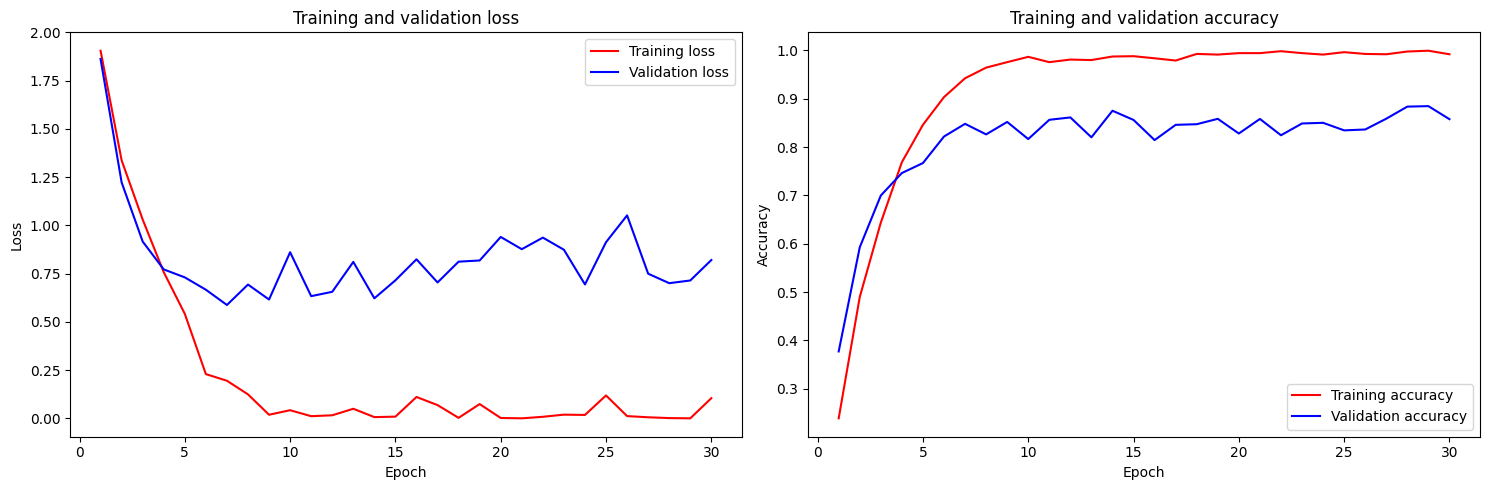

In [100]:
plot_history(tlh1, vlh1, tah1, vah1)

# *EXPERIMENT 2*
*Learning Rate:* **0.001**

*Batch Size:* **128**

In [129]:
model2 = VegetableClassifier() 
tlh2, vlh2, tah2, vah2 = experiment(2, model2, lr=0.001, batch_size=128)


EXPERIMENT 2 
LR:0.001, batch:128
-------------------

Epoch 1/30	Train Loss: 2.3012	Val Loss: 2.0880	Train Acc: 16.77%	Val Acc: 33.71%
Epoch 2/30	Train Loss: 1.4763	Val Loss: 1.7197	Train Acc: 42.17%	Val Acc: 41.61%
Epoch 3/30	Train Loss: 1.0999	Val Loss: 1.2052	Train Acc: 56.03%	Val Acc: 58.27%
Epoch 4/30	Train Loss: 0.8721	Val Loss: 1.1665	Train Acc: 69.13%	Val Acc: 61.52%
Epoch 5/30	Train Loss: 0.6247	Val Loss: 0.7753	Train Acc: 76.57%	Val Acc: 75.37%
Epoch 6/30	Train Loss: 0.6231	Val Loss: 0.7554	Train Acc: 84.47%	Val Acc: 75.14%
Epoch 7/30	Train Loss: 0.1617	Val Loss: 0.6725	Train Acc: 89.83%	Val Acc: 80.71%
Epoch 8/30	Train Loss: 0.2581	Val Loss: 0.6261	Train Acc: 92.57%	Val Acc: 83.04%
Epoch 9/30	Train Loss: 0.2172	Val Loss: 0.5355	Train Acc: 95.50%	Val Acc: 85.79%
Epoch 10/30	Train Loss: 0.1739	Val Loss: 0.7849	Train Acc: 96.07%	Val Acc: 81.45%
Epoch 11/30	Train Loss: 0.0720	Val Loss: 0.7321	Train Acc: 97.27%	Val Acc: 83.14%
Epoch 12/30	Train Loss: 0.0118	Val Loss: 0.7797	Tra

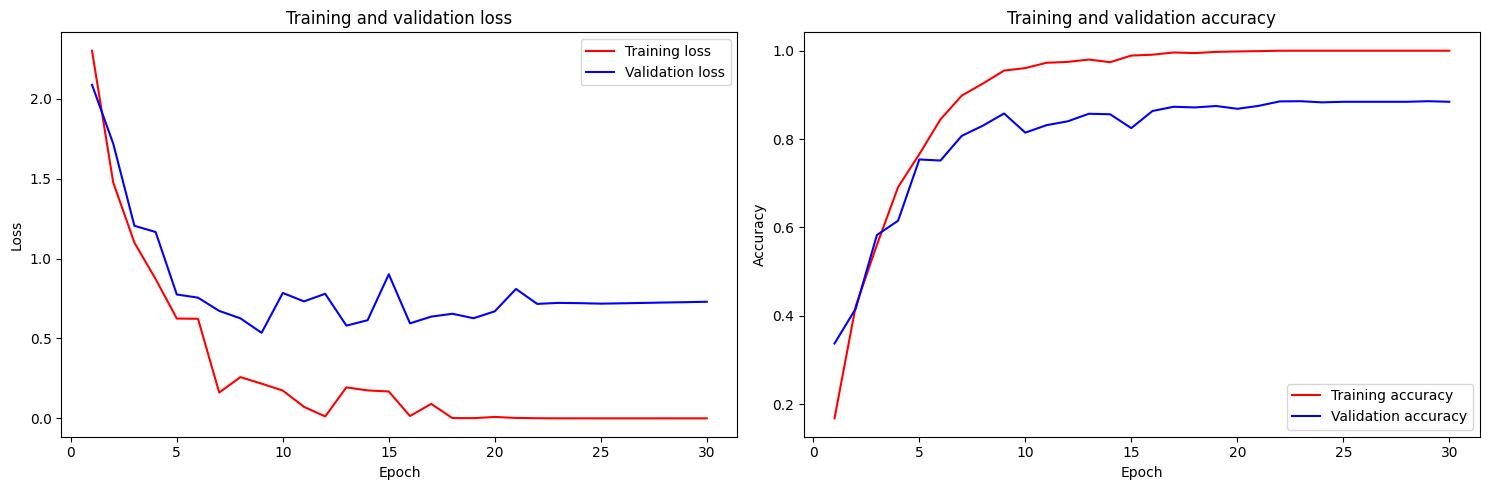

In [130]:
plot_history(tlh2, vlh2, tah2, vah2)

# *EXPERIMENT 3*
*Learning Rate:* **0.0005**

*Batch Size:* **64**

In [131]:
model3 = VegetableClassifier() 
tlh3, vlh3, tah3, vah3 = experiment(3, model3, lr=0.0005, batch_size=64)


EXPERIMENT 3 
LR:0.0005, batch:64
-------------------

Epoch 1/30	Train Loss: 1.9068	Val Loss: 1.7679	Train Acc: 26.97%	Val Acc: 43.87%
Epoch 2/30	Train Loss: 1.1595	Val Loss: 1.2691	Train Acc: 53.20%	Val Acc: 57.77%
Epoch 3/30	Train Loss: 0.9417	Val Loss: 0.8207	Train Acc: 67.07%	Val Acc: 71.24%
Epoch 4/30	Train Loss: 0.7909	Val Loss: 0.6302	Train Acc: 79.43%	Val Acc: 77.65%
Epoch 5/30	Train Loss: 0.4618	Val Loss: 0.4802	Train Acc: 85.90%	Val Acc: 84.94%
Epoch 6/30	Train Loss: 0.3084	Val Loss: 0.5052	Train Acc: 90.27%	Val Acc: 84.91%
Epoch 7/30	Train Loss: 0.1048	Val Loss: 0.5382	Train Acc: 94.80%	Val Acc: 85.09%
Epoch 8/30	Train Loss: 0.1445	Val Loss: 0.4948	Train Acc: 95.33%	Val Acc: 85.30%
Epoch 9/30	Train Loss: 0.1131	Val Loss: 0.4444	Train Acc: 96.93%	Val Acc: 87.90%
Epoch 10/30	Train Loss: 0.1472	Val Loss: 0.5687	Train Acc: 96.63%	Val Acc: 85.64%
Epoch 11/30	Train Loss: 0.0986	Val Loss: 0.5083	Train Acc: 98.20%	Val Acc: 87.92%
Epoch 12/30	Train Loss: 0.0990	Val Loss: 0.5443	Tra

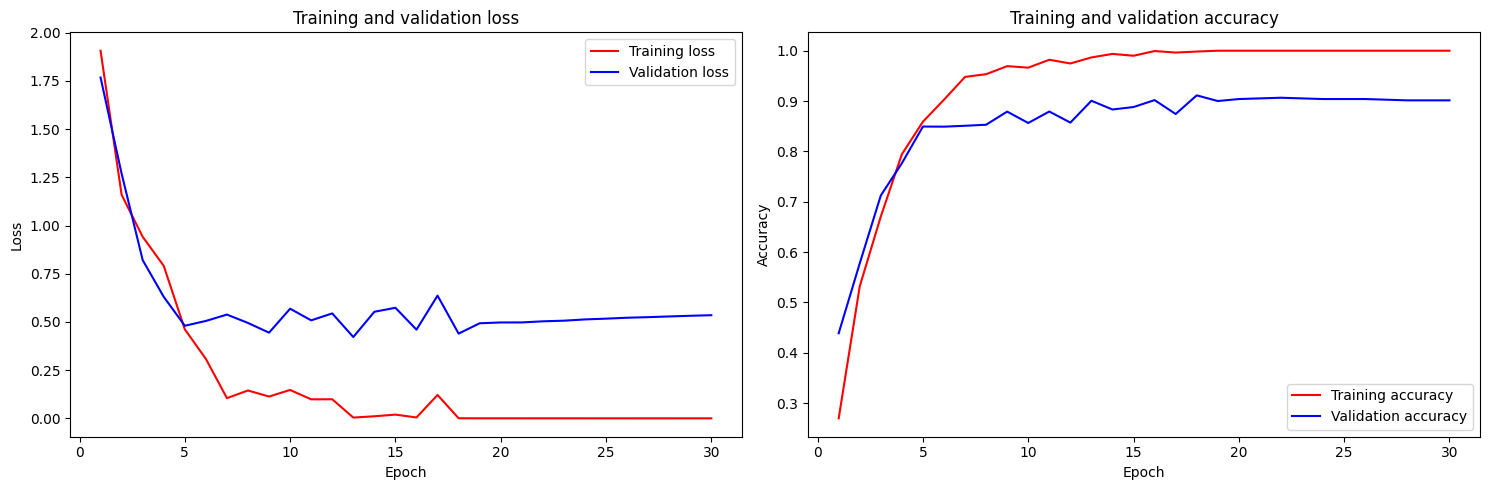

In [132]:
plot_history(tlh3, vlh3, tah3, vah3)

# *EXPERIMENT 4*
*Learning Rate:* **0.0005**

*Batch Size:* **128**

In [133]:
model4 = VegetableClassifier() 
tlh4, vlh4, tah4, vah4 = experiment(4, model4, lr=0.0005, batch_size=128)


EXPERIMENT 4 
LR:0.0005, batch:128
-------------------

Epoch 1/30	Train Loss: 1.8975	Val Loss: 1.8741	Train Acc: 26.27%	Val Acc: 36.70%
Epoch 2/30	Train Loss: 1.2808	Val Loss: 1.4114	Train Acc: 48.00%	Val Acc: 54.14%
Epoch 3/30	Train Loss: 1.0139	Val Loss: 1.2349	Train Acc: 61.03%	Val Acc: 59.30%
Epoch 4/30	Train Loss: 0.9141	Val Loss: 0.8413	Train Acc: 69.17%	Val Acc: 72.51%
Epoch 5/30	Train Loss: 0.4364	Val Loss: 0.7264	Train Acc: 80.43%	Val Acc: 74.32%
Epoch 6/30	Train Loss: 0.2752	Val Loss: 0.5805	Train Acc: 84.73%	Val Acc: 81.06%
Epoch 7/30	Train Loss: 0.3263	Val Loss: 0.7389	Train Acc: 88.83%	Val Acc: 76.47%
Epoch 8/30	Train Loss: 0.2479	Val Loss: 0.4323	Train Acc: 92.00%	Val Acc: 85.83%
Epoch 9/30	Train Loss: 0.1957	Val Loss: 0.6864	Train Acc: 92.83%	Val Acc: 80.31%
Epoch 10/30	Train Loss: 0.0880	Val Loss: 0.6073	Train Acc: 93.87%	Val Acc: 84.40%
Epoch 11/30	Train Loss: 0.1550	Val Loss: 0.5456	Train Acc: 97.63%	Val Acc: 85.05%
Epoch 12/30	Train Loss: 0.1045	Val Loss: 0.5036	Tr

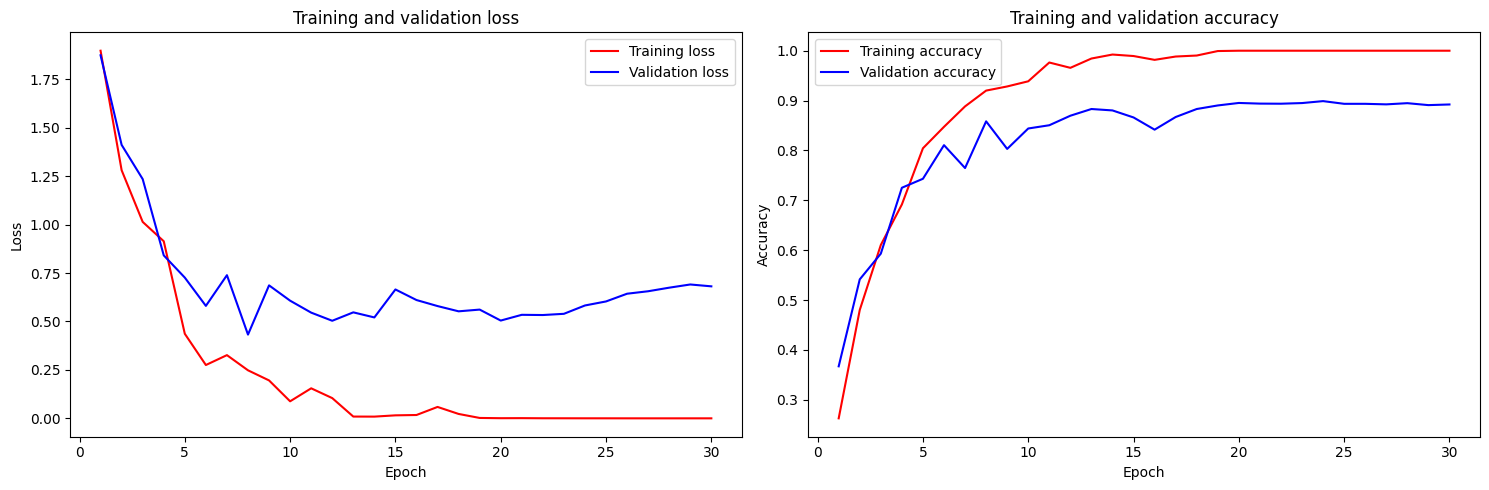

In [134]:
plot_history(tlh4, vlh4, tah4, vah4)

# *EXPERIMENT 5*
*Learning Rate:* **0.0001**

*Batch Size:* **64**

In [135]:
model5 = VegetableClassifier() 
tlh5, vlh5, tah5, vah5 = experiment(5, model5, lr=0.0001, batch_size=64)


EXPERIMENT 5 
LR:0.0001, batch:64
-------------------

Epoch 1/30	Train Loss: 1.7490	Val Loss: 1.9382	Train Acc: 24.30%	Val Acc: 35.13%
Epoch 2/30	Train Loss: 1.4419	Val Loss: 1.6276	Train Acc: 47.07%	Val Acc: 49.30%
Epoch 3/30	Train Loss: 1.0051	Val Loss: 1.1956	Train Acc: 59.07%	Val Acc: 61.70%
Epoch 4/30	Train Loss: 0.7947	Val Loss: 1.0568	Train Acc: 65.73%	Val Acc: 65.69%
Epoch 5/30	Train Loss: 0.8631	Val Loss: 0.9435	Train Acc: 72.70%	Val Acc: 67.75%
Epoch 6/30	Train Loss: 0.4238	Val Loss: 0.8813	Train Acc: 76.70%	Val Acc: 72.80%
Epoch 7/30	Train Loss: 0.7100	Val Loss: 0.7149	Train Acc: 81.10%	Val Acc: 76.65%
Epoch 8/30	Train Loss: 0.4706	Val Loss: 0.5712	Train Acc: 84.87%	Val Acc: 79.16%
Epoch 9/30	Train Loss: 0.2873	Val Loss: 0.6372	Train Acc: 86.67%	Val Acc: 77.82%
Epoch 10/30	Train Loss: 0.3988	Val Loss: 0.5981	Train Acc: 89.13%	Val Acc: 79.43%
Epoch 11/30	Train Loss: 0.2788	Val Loss: 0.5873	Train Acc: 89.73%	Val Acc: 82.23%
Epoch 12/30	Train Loss: 0.4427	Val Loss: 0.4691	Tra

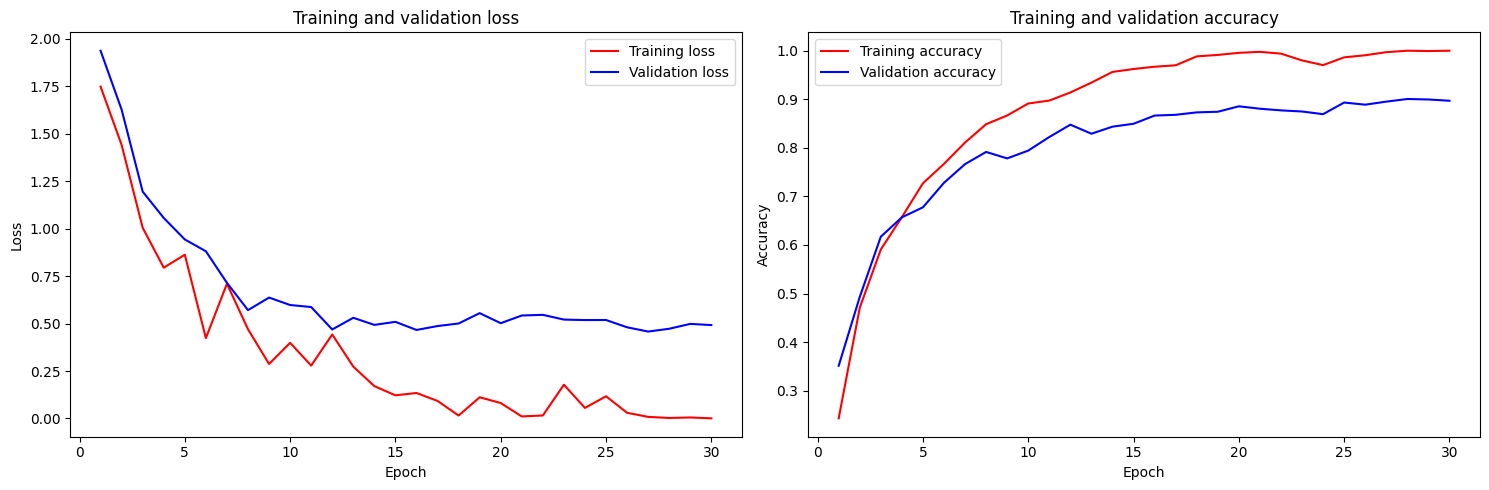

In [136]:
plot_history(tlh5, vlh5, tah5, vah5)

# *EXPERIMENT 6*
*Learning Rate:* **0.0001**

*Batch Size:* **128**

In [137]:
model6 = VegetableClassifier() 
tlh6, vlh6, tah6, vah6 = experiment(6, model6, lr=0.0001, batch_size=128)


EXPERIMENT 6 
LR:0.0001, batch:128
-------------------

Epoch 1/30	Train Loss: 2.2564	Val Loss: 2.2301	Train Acc: 14.73%	Val Acc: 29.12%
Epoch 2/30	Train Loss: 1.9569	Val Loss: 1.8122	Train Acc: 37.50%	Val Acc: 45.12%
Epoch 3/30	Train Loss: 1.3610	Val Loss: 1.4529	Train Acc: 51.47%	Val Acc: 55.42%
Epoch 4/30	Train Loss: 1.1373	Val Loss: 1.3306	Train Acc: 56.90%	Val Acc: 56.98%
Epoch 5/30	Train Loss: 1.1829	Val Loss: 1.0947	Train Acc: 64.13%	Val Acc: 64.47%
Epoch 6/30	Train Loss: 0.9926	Val Loss: 0.9834	Train Acc: 68.93%	Val Acc: 66.68%
Epoch 7/30	Train Loss: 0.9553	Val Loss: 0.9085	Train Acc: 74.17%	Val Acc: 67.72%
Epoch 8/30	Train Loss: 0.6921	Val Loss: 0.8836	Train Acc: 72.67%	Val Acc: 72.17%
Epoch 9/30	Train Loss: 0.5292	Val Loss: 0.7520	Train Acc: 77.10%	Val Acc: 73.88%
Epoch 10/30	Train Loss: 0.6858	Val Loss: 0.7127	Train Acc: 79.67%	Val Acc: 76.09%
Epoch 11/30	Train Loss: 0.4839	Val Loss: 0.6048	Train Acc: 82.90%	Val Acc: 79.56%
Epoch 12/30	Train Loss: 0.4122	Val Loss: 0.6328	Tr

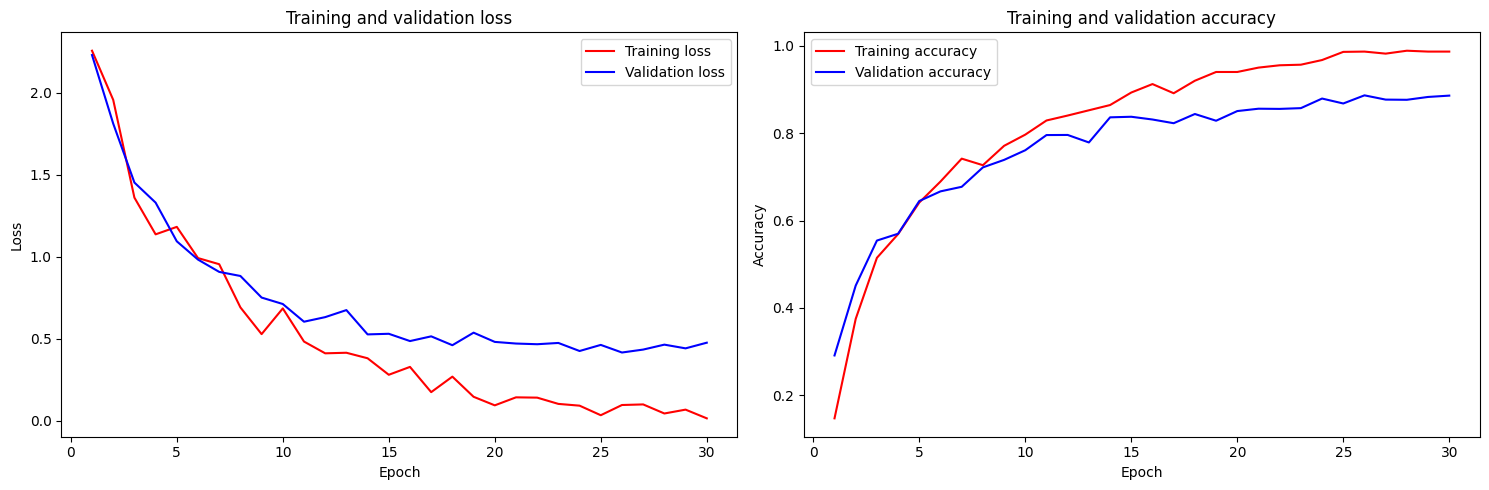

In [138]:
plot_history(tlh6, vlh6, tah6, vah6)

### **Results of Experiments**
**Validation Accuracies:**

***Model 1*** *(0.001, 64)*:    **85.77%**

***Model 2*** *(0.001, 128)*:    **88.44%**

***Model 3*** *(0.0005, 64)*:    **90.40%**

***Model 4*** *(0.0005, 128)*:    **89.35%**

***Model 5*** *(0.0001,  64)*:    **89.33%**

***Model 6*** *(0.0001, 128)*:    **88.59%**





The best model is Model 3 with highest validation accuracy with 90.40%. 

So it is selected for evaluation on the test set. 

In [184]:
## Testing the trained model on the test set to evaluate its performance
## Computing metrics such as accuracy, precision, recall, and F1-score
## Visualizing confusion matrix to understand the model's behavior across different classes
## Commenting on the results

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model3.to(device)

model3.eval() 
test_loss = 0
correct = 0

y_true = []
y_pred = []

with torch.no_grad():
  for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model3(data)
    pred = output.argmax(dim=1, keepdim=True)
    
    y_true.extend(target.tolist()) 
    y_pred.extend(pred.flatten().tolist())

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')  
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Accuracy:\t{(accuracy*100):.2f}%")
print(f"Precision:\t{precision:.4f}")
print(f"Recall:\t\t{recall:.4f}")
print(f"F1-score:\t{f1:.4f}")


Accuracy:	91.07%
Precision:	0.9123
Recall:		0.9107
F1-score:	0.9106


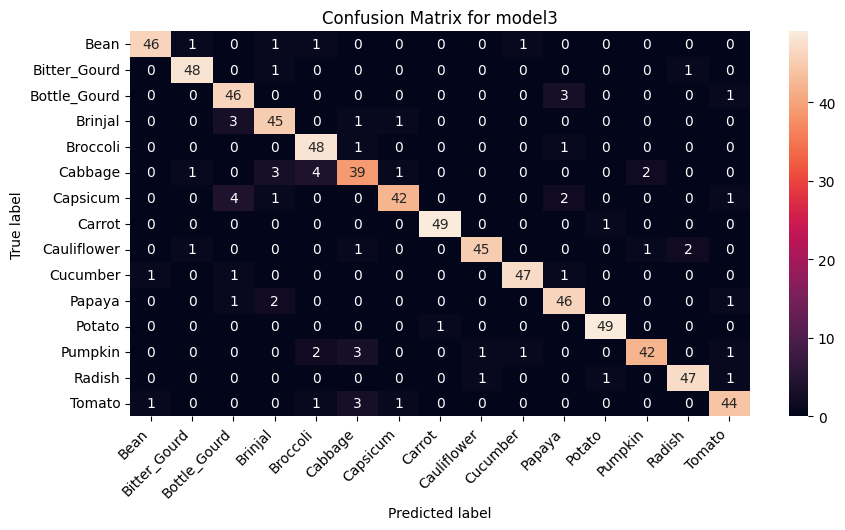

In [164]:
cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes) 
plt.figure(figsize=(10,5))

heatmap = sn.heatmap(df_cm, annot=True, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.title('Confusion Matrix for model3')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



### ***Test Set Performance Summary***

The CNN model achieved an accuracy of ***91.07%*** on the test set. This indicates that the model correctly classified nearly 91% of the vegetable images.

***Precision: 0.9123*** - Precision signifies that out of all the images the model classified as a particular vegetable class, 91.23% were truly that vegetable class.

***Recall: 0.9107*** - Recall metric indicates that out of all the images belonging to a particular vegetable class in the test set, the model was able to correctly classify 91.07% of them.

***F1-score: 0.9106*** - F1-score is the harmonic mean of precision and recall, providing a balanced view of the model's performance, and it is 0.9106 in this case.

### ***Challenges and Areas for Improvement***

While the model demonstrates promising performance, there might be room for improvement. Here are some general challenges to consider:

***Overfitting:*** Overfitting is a potential concern during training, where the model memorizes training data patterns but fails to generalize well to unseen data. Techniques like using early stopping, and data augmentation can help mitigate overfitting.

***Hyperparameter Tuning:*** The effectiveness of the model can be sensitive to hyperparameter choices like learning rate, optimizer, and number of epochs. Experimentation and grid search approaches can help identify optimal hyperparameter settings.


### ***Reflection on CNN Architecture and Training Approach***

The chosen CNN architecture with sequential convolutional blocks and ReLU activations appears to be a reasonable foundation for vegetable image classification. It incorporates key elements for feature extraction and classification. The test set performance suggests that this architecture, in combination with the applied training approach, has learned effective image representations for the vegetable classification task.

# 2. Exploring Transfer Learning with ResNet50

### 2.1. Introduction

### ***Objective:***  
Leverage the power of a pre-trained ResNet50 model for classifying vegetable images, improving both efficiency and potentially performance compared to training a CNN entirely from scratch.

### ***Methodology***:

***Loading Pre-trained ResNet50:*** 
ResNet50 model has been utilized which is pre-trained on a massive dataset like ImageNet. This model has already developed the ability to extract generic, powerful image features.

***Replacing Final Layer:*** Removed the final fully connected layer of ResNet50 and replaced it with a new layer tailored to the number of classes in our vegetable dataset.

***Fine-Tuning:*** 
Trained the model while choosing how we want to update the existing weights of the network:

***Freezing All Layers (Feature Extraction):*** 
ResNet50 has been used solely as a feature extractor, keeping its weights frozen. Only the newly added layer has trained.

Fine-tuning is a transfer learning technique where you adapt a pre-trained model to a new, but related, task.  Instead of training a model from scratch with random initial weights, you start with a model that has already learned to identify general features. You then reshape it and adjust its weights to suit your specific dataset and classification problem.

### ***Why Fine-Tuning?***

***Faster Training:*** Pre-trained models provide a solid initialization point, often leading to faster convergence compared to starting from scratch.

***Improved Performance:*** Leveraging the learned features from the pre-trained model can potentially boost the performance of our model, especially when datasets are smaller like in this task.

***Reduced Data Requirements:*** Can be achieved strong results with less training data since there is no need to train every single parameter in a large network.

### ***Why Freezing Initial Layers and Train Only the Last Layers?***

***General vs. Specific Features:*** The initial layers of a deep CNN like ResNet50 learn to recognize very generic features (e.g., edges, colors, basic shapes). These features are often transferable to many image tasks. Later layers become increasingly specialized to the dataset the network was originally trained on.

***Efficiency:*** Freezing early layers saves time and computational resources, focusing the training on adapting the later, more specialized layers and the new classifier to the specifics of our vegetable dataset.

***Overfitting Prevention:*** Freezing weights helps avoid overfitting when the dataset is relatively small, as there are fewer parameters to update.

### 2.2. Loading the pre-trained ResNet50 model


In [174]:
## Utilizing torchvision library to load the pre-trained ResNet50 model
## Ensuring that the model's architecture matches ResNet50, by checking the model summary.

model = torchvision.models.resnet50(pretrained=True)

Printing the model to ensure that it matches ResNet50 and is correctly loaded.

In [175]:
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### 2.3 Modifying the ResNet50 model for transfer learning

In [177]:
## Freezing all layers of the ResNet50 model.
## Replacing the final fully connected layer with a new FC layer matching the number of classes
## Unfreezing the final FC layer

for param in model.parameters():
    param.requires_grad = False 

num_classes = 15
model.fc = nn.Linear(model.fc.in_features, num_classes)

In [178]:
## Defining appropriate loss function and optimizer for training

criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)


Printing trained layers to be sure about only the last FC layers has been trained.

In [179]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name) 


fc.weight
fc.bias


In [180]:
## Training the modified ResNet50 model on the vegetable image dataset.
## Iterating over the training dataset in mini-batches, computing the loss, updating model parameters.
## Monitoring the training process and evaluating the model's performance on the validation set periodically.
## Visualizing the accuracy and loss changes of the model across training and validation datasets.

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device) 

tlh, vlh, tah, vah = train(model, criterion, train_loader, val_loader, lr=0.001)

Epoch 1/30	Train Loss: 1.0703	Val Loss: 0.9695	Train Acc: 56.90%	Val Acc: 77.46%
Epoch 2/30	Train Loss: 0.6323	Val Loss: 0.7682	Train Acc: 80.87%	Val Acc: 79.62%
Epoch 3/30	Train Loss: 0.5192	Val Loss: 0.6480	Train Acc: 86.20%	Val Acc: 82.77%
Epoch 4/30	Train Loss: 0.4290	Val Loss: 0.6037	Train Acc: 88.23%	Val Acc: 84.26%
Epoch 5/30	Train Loss: 0.4283	Val Loss: 0.5414	Train Acc: 90.07%	Val Acc: 85.94%
Epoch 6/30	Train Loss: 0.3883	Val Loss: 0.5186	Train Acc: 91.33%	Val Acc: 84.99%
Epoch 7/30	Train Loss: 0.2465	Val Loss: 0.4994	Train Acc: 92.33%	Val Acc: 85.56%
Epoch 8/30	Train Loss: 0.3146	Val Loss: 0.4916	Train Acc: 94.03%	Val Acc: 86.13%
Epoch 9/30	Train Loss: 0.2370	Val Loss: 0.4802	Train Acc: 94.37%	Val Acc: 86.99%
Epoch 10/30	Train Loss: 0.2089	Val Loss: 0.4515	Train Acc: 94.50%	Val Acc: 87.87%
Epoch 11/30	Train Loss: 0.3537	Val Loss: 0.4308	Train Acc: 94.80%	Val Acc: 88.29%
Epoch 12/30	Train Loss: 0.1856	Val Loss: 0.4380	Train Acc: 95.27%	Val Acc: 86.88%
Epoch 13/30	Train Loss: 0

### 2.4 Evaluating the fine-tuned ResNet50 model

In [188]:
## Testing the model on the test set to evaluate its performance.
## Computing metrics such as accuracy, precision, recall, and F1-score to assess classification performance.
## Comparing the fine-tuned ResNet50 model performance with the CNN model implemented from scratch

model.eval()

test_loss = 0.0
correct = 0
y_true = []
y_pred = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)

        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)

        correct += pred.eq(target.view_as(pred)).sum().item()
        y_true.extend(target.tolist())
        y_pred.extend(pred.flatten().tolist())

test_loss /= len(test_loader.dataset)
test_accuracy = 100. * correct / len(test_loader.dataset)

from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f'Accuracy:\t{test_accuracy:.2f}%')
print(f'Precision:\t{precision:.4f}')
print(f'Recall:\t\t{recall:.4f}')
print(f'F1-Score:\t{f1:.4f}')

Accuracy:	90.27%
Precision:	0.9052
Recall:		0.9027
F1-Score:	0.9025


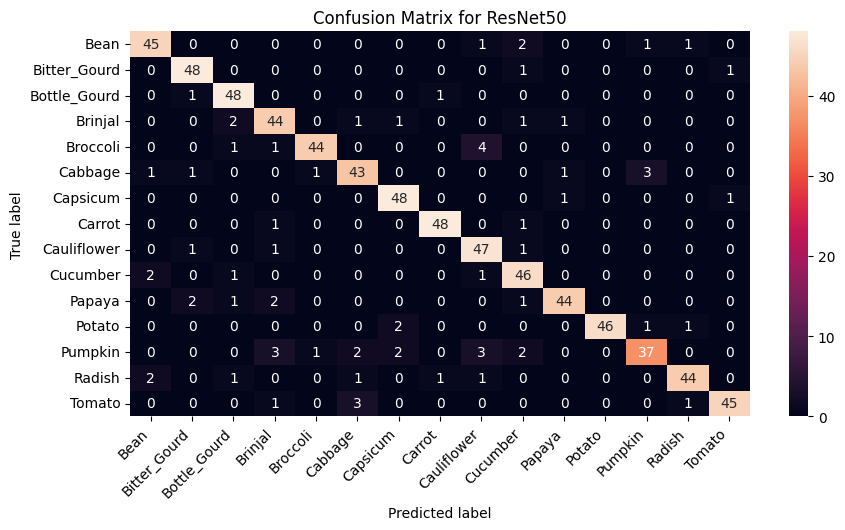

In [189]:
cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes) 
plt.figure(figsize=(10,5))

heatmap = sn.heatmap(df_cm, annot=True, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.title('Confusion Matrix for ResNet50')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 2.5 Analysis of advantages and disadvantages 

### ***Comparison of Models:***

| Metric | CNN Model | ResNet50 Model |
|---|---|---|
| Accuracy | 91.07% | 90.27% |
| Precision | 0.9123 | 0.9052 |
| Recall | 0.9107 | 0.9027 |
| F1-Score | 0.9106 | 0.9025 |

- CNN model achieves slightly higher overall accuracy, indicating a marginally better ability to predict the correct vegetable class across all images.

- CNN has slightly higher precision, suggesting that it's a bit more reliable when it comes to its positive predictions.

- Both models excel at recall, implying that they rarely miss the correct vegetable class in the dataset. CNN holds a very slight advantage.

- The F1-scores of both models are very close, highlighting their balanced performance. The CNN model marginally outperforms the ResNet50 model on this metric.

### **Key Observations:**

***Close Performance:*** Both the CNN model and the ResNet50 model demonstrate excellent performance on our vegetable dataset. The differences in metrics are relatively small, indicating that both approaches are effective.

***Pre-trained Power:*** It's impressive that the ResNet50 model, even with only basic transfer learning, achieves results closely comparable to a CNN trained from scratch. This emphasizes the benefits of leveraging pre-trained models.

***Slight Edge for CNN:*** The CNN model from scratch holds a very slight advantage in most performance metrics. This could signify that its architecture might be slightly better tailored to the specific nuances of the vegetable dataset.

### **Possible Refinements:**

***Fine-Tuning ResNet50:*** It could be potentially improved the ResNet50 model's performance by experimenting with fine-tuning more layers or employing a different learning rate.

***Ensemble Approach:*** Can be considered combining the predictions of both models to see if it further improves the performance.





### ***Transfer Learning vs. Training from Scratch:***

**Transfer Learning Advantages:**

***Faster Training:*** Pre-trained models provide a solid initialization point, often leading to faster convergence compared to starting from scratch.

***Improved Performance:*** Leveraging the learned features from the pre-trained model can potentially boost the performance of model, especially when datasets are smaller like in this task.

***Reduced Data Requirements:*** May be achieved strong results with less training data since you don't need to train every single parameter in a large network.





**Transfer Learning Disadvantages:**

***Potential Overfitting:*** If the pre-trained model is not well-suited to the new task, it can lead to overfitting as the model memorizes the training data rather than learning generalizable patterns.

***Limited Flexibility:*** The pre-trained model's architecture may not be perfectly suited for the new task, potentially restricting the model's ability to fully adapt.




**Training from Scratch Advantages:**

***Full Flexibility:*** Having complete control over the model architecture, allowing us to tailor it specifically to our task.

***No Overfitting from Pre-trained Model:*** Avoiding the potential overfitting issues that can arise from using a pre-trained model.




**Training from Scratch Disadvantages:**

***Slower Training:*** Starting from scratch can require significantly more training time and computational resources, especially for large datasets.

***Data Requirements:*** Training a model from scratch typically requires a larger dataset to achieve good performance.


### ***Conclusion:***

Both transfer learning and training from scratch have their merits and drawbacks. The best approach depends on the specific characteristics of the provided dataset, task, and computational resources. In this task, both of models can be used on classifying vegetables with a slight advantage of CNN model.